In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.io import loadmat
import warnings
plt.rcParams['font.family'] = 'Times New Roman'
warnings.filterwarnings("ignore")


rdm_path = '../../output/baseline_static_vit/things/rdm/static_rdm.hdf5'
plot1_title = 'CLIP-ViT Predicted Dissimilarity'

# rdm_path = '../../output/cliphba_66d_official/things/rdm/static_rdm.hdf5'
# plot1_title = 'CLIP-HBA Predicted Dissimilarity'


In [313]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

triplet48_rdm = np.array(loadmat("../Data/RDM48_triplet.mat")['RDM48_triplet'])
# fig, ax = plt.subplots(dpi=100)  # Create a new figure and axes
# fig.patch.set_facecolor('none')  # Set the figure facecolor to none
# ax.set_facecolor('none')  # Set the axes facecolor to none
# im = ax.imshow(triplet48_rdm, cmap='viridis_r', vmin=0, vmax=1)  # Display the image

# # Create a new axes to the left of the current axes and create the colorbar there
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("left", size="5%", pad=0.05)
# plt.colorbar(im, cax=cax, orientation='vertical')
# cax.yaxis.set_ticks_position('left')

# ax.set_title('48 Objects Measured Behavioral RDM', fontweight='bold', fontsize=12)  # Set the title

In [314]:
import h5py
f = h5py.File(rdm_path, 'r')
hba_rdm = f['rdm'][()]
index_path = "../Data/triplet48_index.npy"
sample_index = np.load(index_path)
hba48_rdm = hba_rdm[sample_index][:, sample_index]

print(hba48_rdm.shape)


(48, 48)


In [315]:
from scipy.stats import spearmanr
def upper_triangular_spearmanr(rdm1, rdm2):

    # Extract the upper triangular part of the RDMs
    rdm1 = rdm1[np.triu_indices(rdm1.shape[0], k=1)]
    rdm2 = rdm2[np.triu_indices(rdm2.shape[0], k=1)]

    # Calculate the Spearman correlation
    correlation, p_value = spearmanr(rdm1, rdm2)

    return correlation, p_value

correlation, p_value = upper_triangular_spearmanr(triplet48_rdm, hba48_rdm)
print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.318239379990456
P-value: 5.774511084117285e-28


In [316]:
import numpy as np

# Fit a line to the data points
coefficients = np.polyfit(hba48_rdm.flatten(), triplet48_rdm.flatten(), 1)
poly = np.poly1d(coefficients)

# # Calculate Spearmanr correlation and p-value
# correlation, p_value = upper_triangular_spearmanr(hba48_rdm, triplet48_rdm)

# # Plot the data points and the fitted line
# plt.scatter(hba48_rdm.flatten(), triplet48_rdm.flatten())
# plt.plot(hba_48_rdm_upper, poly(hba_48_rdm_upper), color='red')
# plt.xlabel('Predicted Similarity')
# plt.ylabel('Measured Similarity')
# plt.title('Predicted vs Measured Similarity')

# # Add text label for Spearman r value and p value
# plt.text(0.1, 0.9, f"Spearmanr r = {correlation:.2f}\nP-value = {p_value:.2f}", transform=plt.gca().transAxes)

# plt.show()

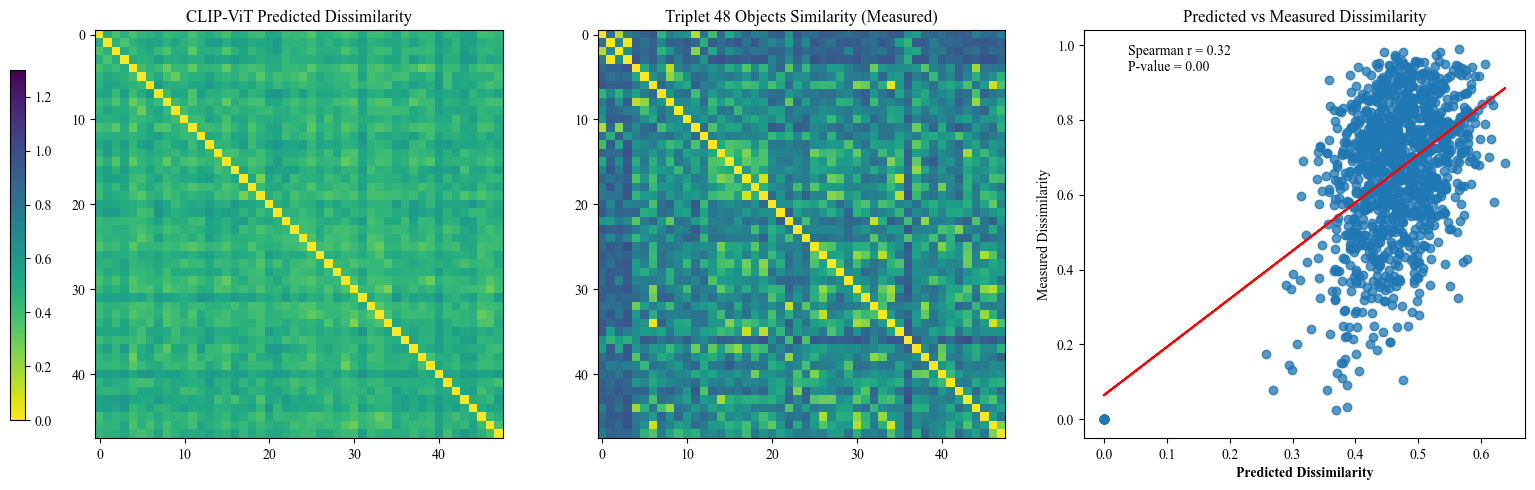

In [317]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot hba48_rdm
im1 = axs[0].imshow(hba48_rdm, cmap='viridis_r', vmin=0, vmax=1.3)
axs[0].set_title(plot1_title)

# Plot triplet49_rdm
im2 = axs[1].imshow(triplet48_rdm, cmap='viridis_r', vmin=0, vmax=1.3)
axs[1].set_title('Triplet 48 Objects Similarity (Measured)')

# Create a new axis for the color bar
cbar_ax = fig.add_axes([-0.02, 0.15, 0.01, 0.7])

# Add color bar
fig.colorbar(im1, cax=cbar_ax)

# Plot scatterplot
axs[2].scatter(hba48_rdm.flatten(), triplet48_rdm.flatten(), alpha=0.5)
axs[2].plot(hba48_rdm.flatten(), poly(hba48_rdm.flatten()), color='red')
axs[2].set_xlabel('Predicted Dissimilarity', fontweight='bold')
axs[2].set_ylabel('Measured Dissimilarity')
axs[2].set_title('Predicted vs Measured Dissimilarity')

# Calculate Spearman correlation and p-value
correlation, p_value = upper_triangular_spearmanr(hba48_rdm, triplet48_rdm)

# Add text label for Spearman r value and p value
axs[2].text(0.1, 0.9, f"Spearman r = {correlation:.2f}\nP-value = {p_value:.2f}", transform=axs[2].transAxes)

plt.tight_layout()

# plt.show()

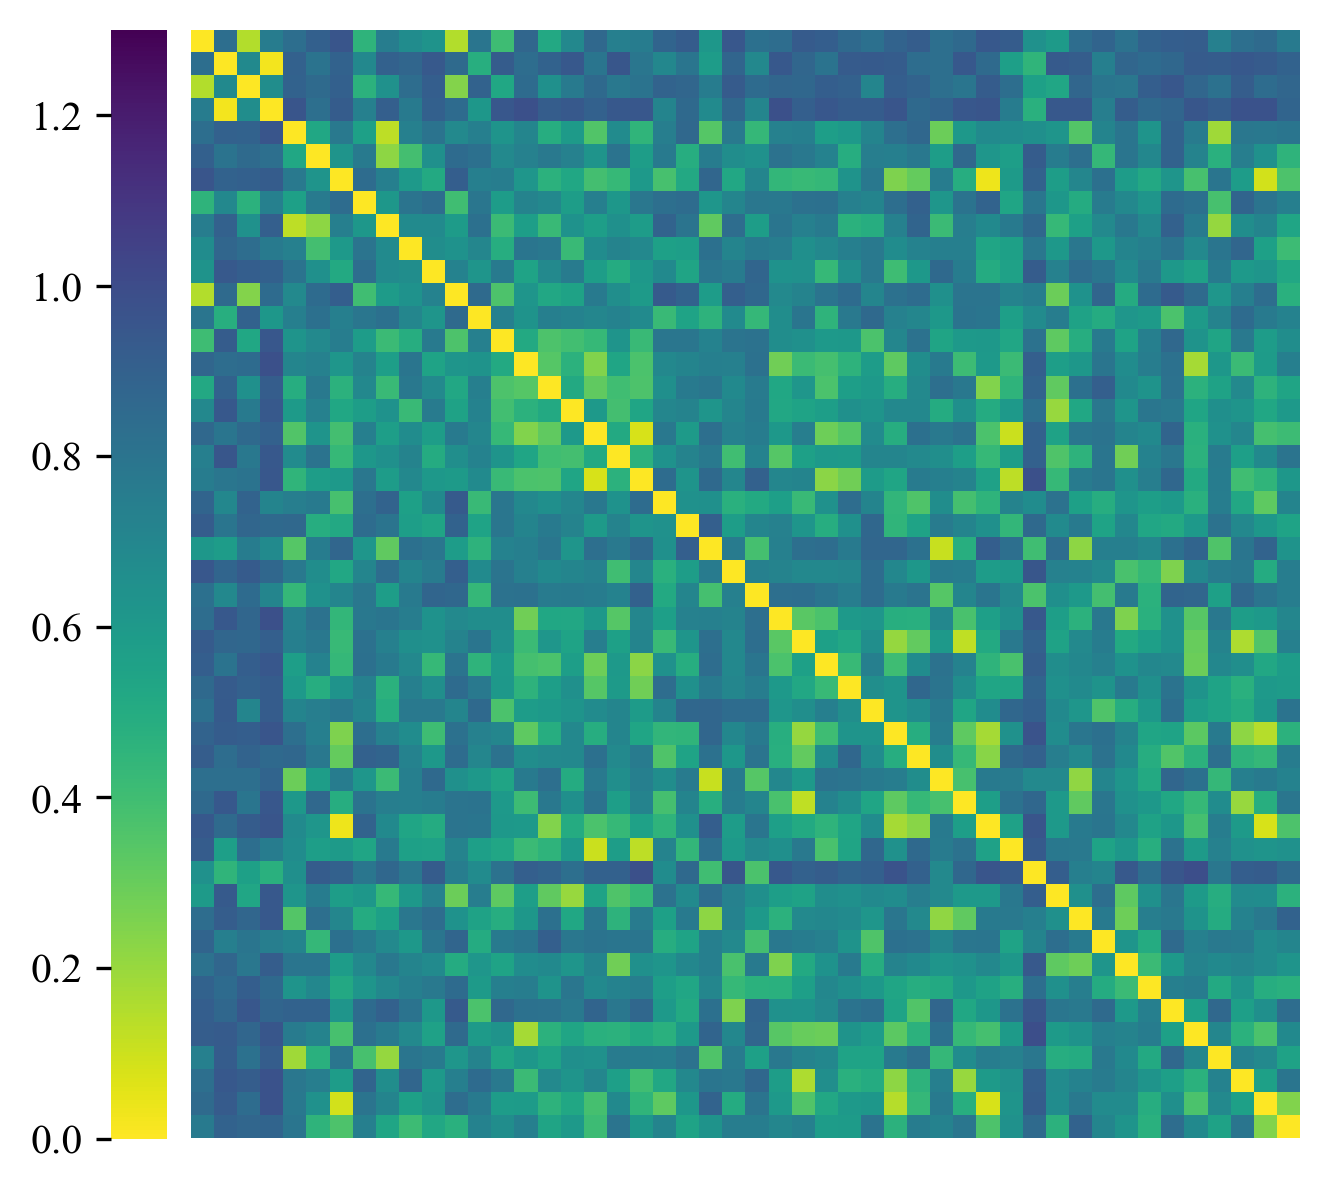

In [318]:
triplet48_rdm = np.array(loadmat("../Data/RDM48_triplet.mat")['RDM48_triplet'])
fig, ax = plt.subplots(dpi=300)  # Create a new figure and axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
fig.patch.set_facecolor('none')  # Set the figure facecolor to none
ax.set_facecolor('none')  # Set the axes facecolor to none
im = ax.imshow(triplet48_rdm, cmap='viridis_r', vmin=0, vmax=1.3)  # Display the image

# Create a new axes to the left of the current axes and create the colorbar there
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", pad=0.08)
plt.colorbar(im, cax=cax, orientation='vertical')
cax.yaxis.set_ticks_position('left')
cax.set_frame_on(False)

# ax.set_title('48 Objects Measured Behavioral RDM', fontweight='bold', fontsize=12)  # Set the title

plt.savefig('../figures/spose_rdm.svg', format='svg', dpi=300, bbox_inches='tight')

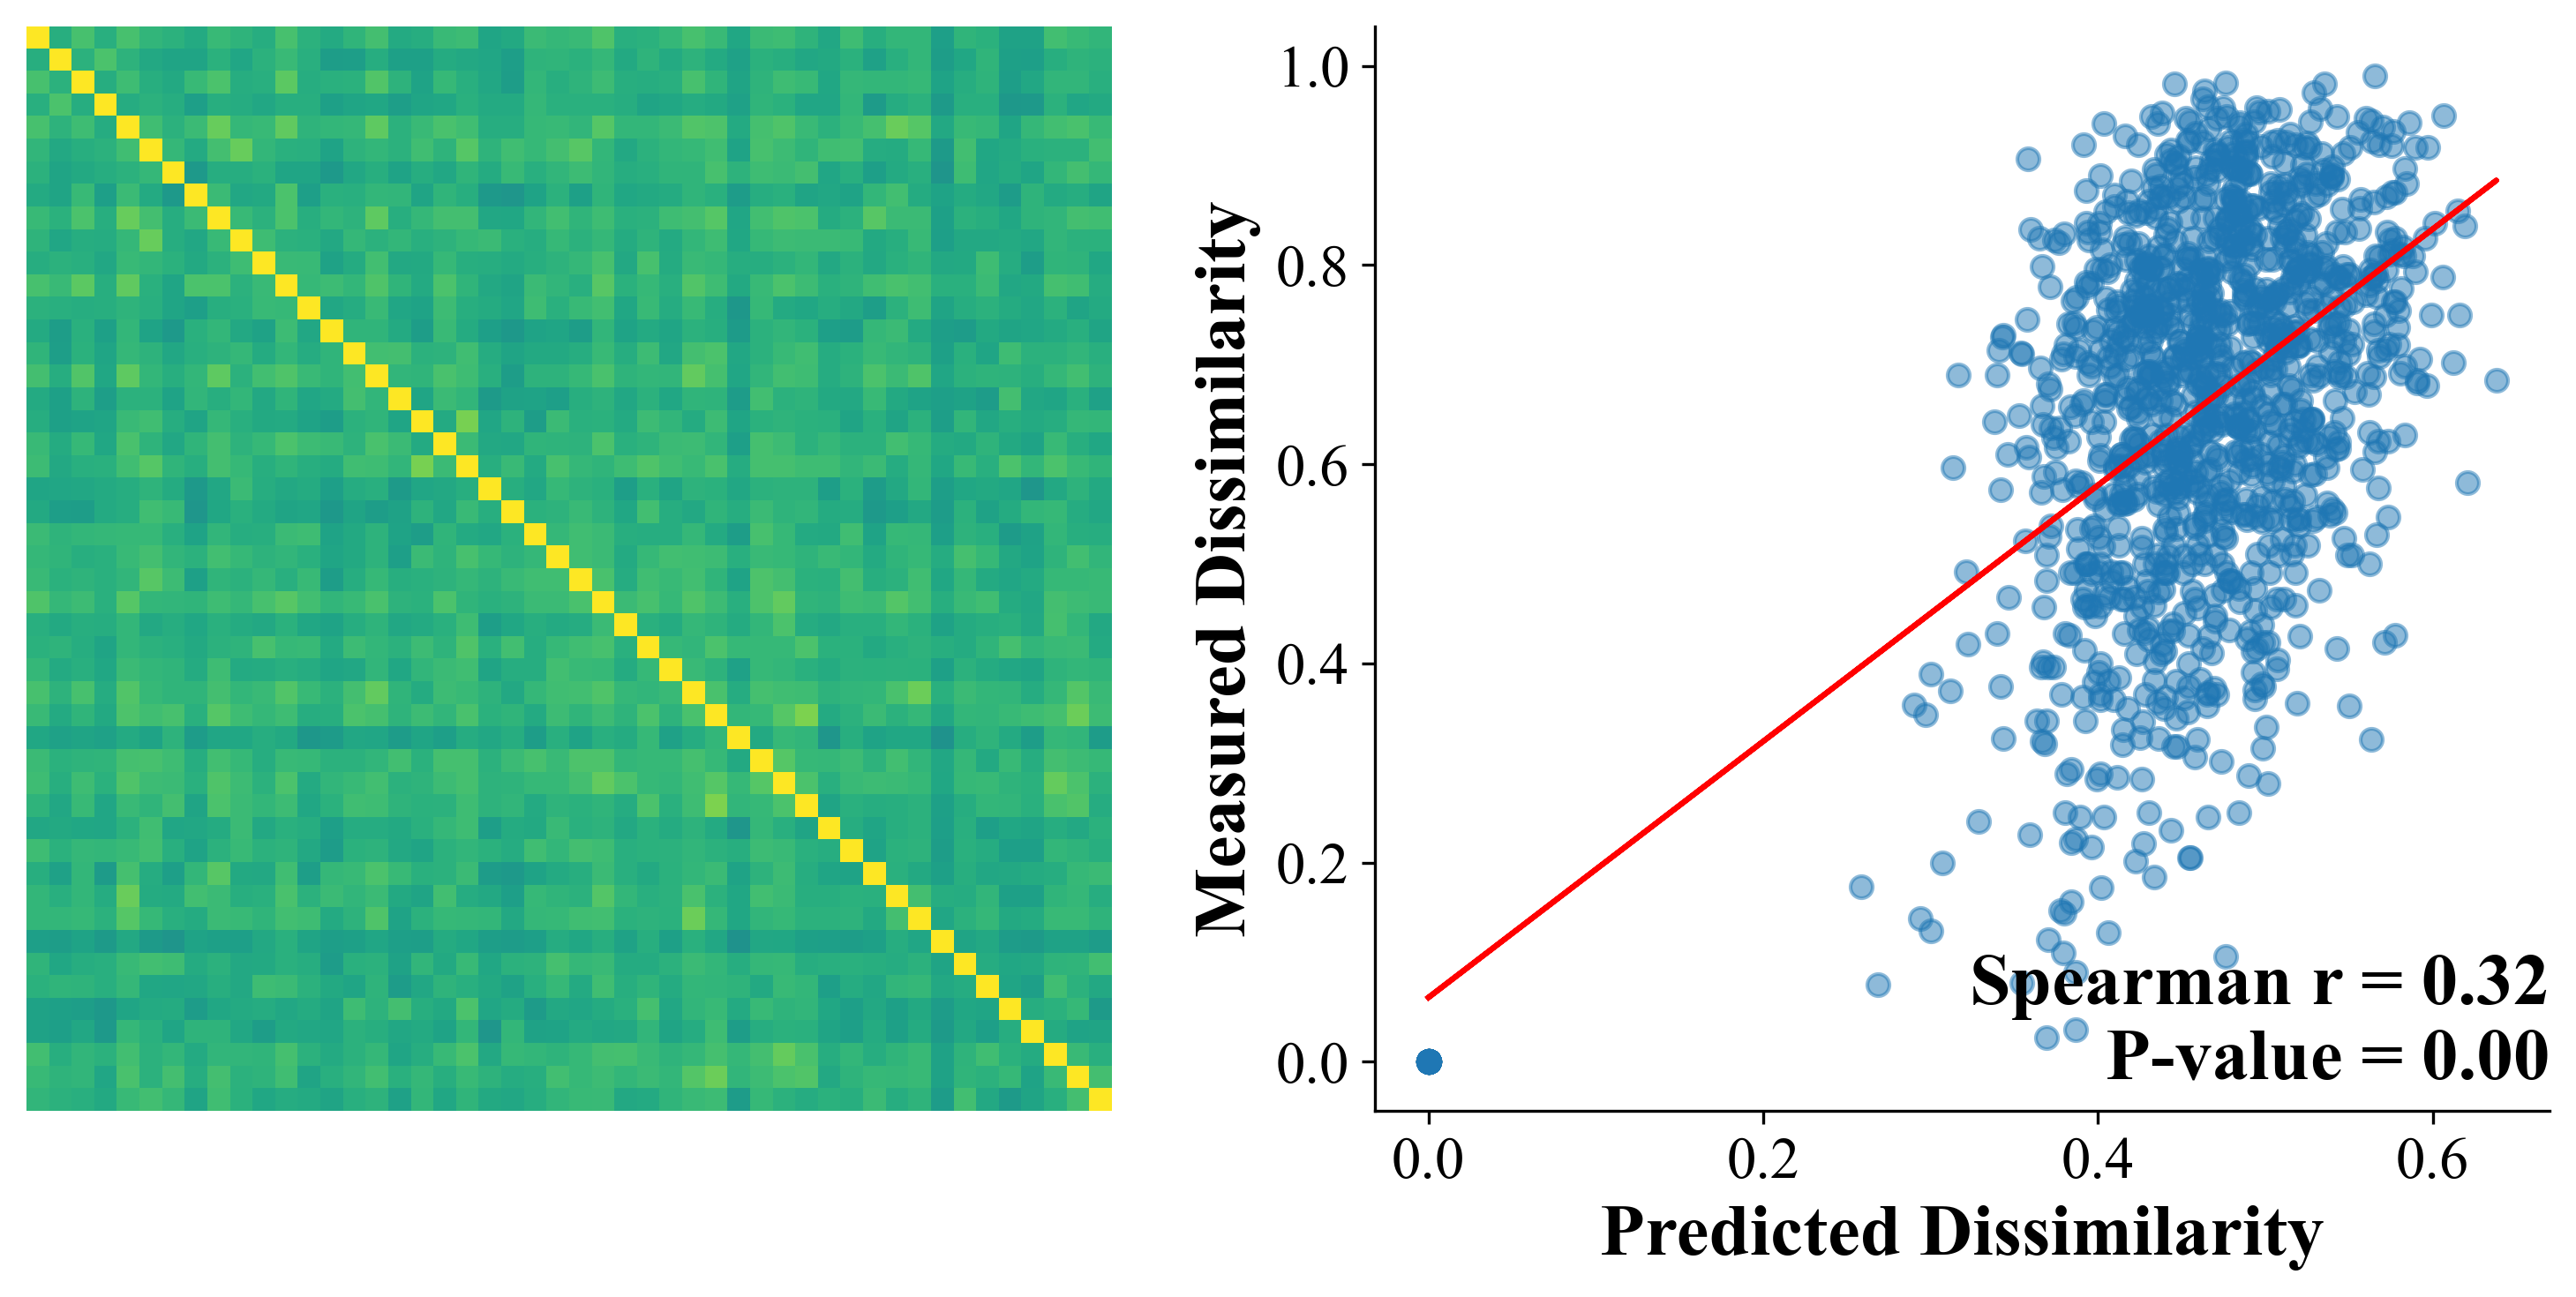

In [319]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=300)
fig.patch.set_facecolor('none')  # Set the figure facecolor to none
axs[0].set_facecolor('none')  # Set the axes facecolor to none

# Plot hba48_rdm
im1 = axs[0].imshow(hba48_rdm, cmap='viridis_r', vmin=0, vmax=1.3)
axs[0].set_xticks([])  # Remove x ticks
axs[0].set_yticks([])  # Remove y ticks
axs[0].set_frame_on(False)  # Remove frame
# axs[0].set_title(plot1_title, fontsize=20, fontweight='bold')

# Plot scatterplot

# use the upper triangular part of the RDMs
hba48_rdm_flat = hba48_rdm[np.triu_indices(hba48_rdm.shape[0], k=0)]
triplet48_rdm_flat = triplet48_rdm[np.triu_indices(triplet48_rdm.shape[0], k=0)]

axs[1].scatter(hba48_rdm_flat, triplet48_rdm_flat, alpha=0.5)
axs[1].plot(hba48_rdm_flat, poly(hba48_rdm_flat), color='red')
axs[1].set_xlabel('Predicted Dissimilarity', fontweight='bold', fontsize=20)
axs[1].set_ylabel('Measured Dissimilarity', fontweight='bold', fontsize=20)
# axs[1].set_title('Predicted vs Measured Dissimilarity', fontsize=20, fontweight='bold')

# Set fixed x and y limits
# axs[1].set_xlim([-0.05, 1.3])  # Adjust these values as needed
# axs[1].set_ylim([-0.05, 1])  # Adjust these values as needed

axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

# Adjust x and y tick font size
axs[1].tick_params(axis='both', which='major', labelsize=16)  # Change 15 to your desired font size

# Calculate Spearman correlation and p-value
correlation, p_value = upper_triangular_spearmanr(hba48_rdm, triplet48_rdm)

# Add text label for Spearman r value and p value
axs[1].text(1, 0.03, f"Spearman r = {correlation:.2f}\nP-value = {p_value:.2f}", transform=axs[1].transAxes, fontsize=20, fontweight='bold', horizontalalignment='right')

plt.tight_layout()

# plt.show()
plt.savefig('../figures/vit48_rdm_scatter.svg', format='svg', dpi=300, bbox_inches='tight')

In [320]:
# import numpy as np
# from scipy.stats import pearsonr
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tqdm import tqdm

# # Define the number of bootstrap samples
# n_bootstraps = 1000

# # Initialize arrays to store the bootstrap results
# bootstrap_correlations = np.zeros(n_bootstraps)
# bootstrap_p_values = np.zeros(n_bootstraps)

# # Perform bootstrap sampling
# for i in tqdm(range(n_bootstraps)):
#     # Generate random indices for resampling with replacement
#     indices = np.random.choice(len(hba48_rdm.flatten()), size=len(hba48_rdm.flatten()), replace=True)
    
#     # Select the resampled data points
#     hba48_resampled = hba48_rdm.flatten()[indices]
#     triplet48_resampled = triplet48_rdm.flatten()[indices]
    
#     # Calculate Spearman correlation and p-value for the resampled data
#     correlation, p_value = spearmanr(hba48_resampled, triplet48_resampled)
    
#     # Store the results
#     bootstrap_correlations[i] = correlation
#     bootstrap_p_values[i] = p_value

# # Calculate the mean and confidence interval for the correlation
# mean_correlation = np.mean(bootstrap_correlations)
# ci_lower = np.percentile(bootstrap_correlations, 2.5)
# ci_upper = np.percentile(bootstrap_correlations, 97.5)

# # Fit a line to the original data points
# coefficients = np.polyfit(hba48_rdm.flatten(), triplet48_rdm.flatten(), 1)
# poly = np.poly1d(coefficients)

# # Plot the data points and the fitted line
# plt.scatter(hba48_rdm.flatten(), triplet48_rdm.flatten())
# # plt.plot(hba48_rdm.flatten(), poly(hba48_rdm.flatten()), color='red')
# sns.lineplot(x=hba48_rdm.flatten(), y=poly(hba48_rdm.flatten()), color='red', errorbar='sd', err_style='band')
# plt.xlabel('Predicted Similarity')
# plt.ylabel('Measured Similarity')
# plt.title('Predicted vs Measured Similarity (Bootstrap)')

# # Add text label for mean Spearman r value and confidence interval
# plt.text(0.1, 0.9, f"Mean Spearman r = {mean_correlation:.2f}\n95% CI = [{ci_lower:.2f}, {ci_upper:.2f}]",
#          transform=plt.gca().transAxes)

# # plt.show()
# # plt.savefig('../figures/vit_scatter_bootstrapped.svg', format='svg')